Importing all the libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Reading the data


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DM_Final_Project/Airline-Dataset.csv', index_col=0)

In [3]:
df.head()

,airline_name,author,author_country,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,Month,Year,recommended
0,adria-airways,D Ito,Germany,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,4.0,4.0,4.0,0.0,4.0,4,2015,1
1,adria-airways,Ron Kuhlmann,United States,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1,2015,1
2,adria-airways,E Albin,Switzerland,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,5.0,5.0,4.0,0.0,5.0,9,2014,1
3,adria-airways,Tercon Bojan,Singapore,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,9,2014,1
4,adria-airways,L James,Poland,WAW-SKJ Economy. No free snacks or drinks on t...,Economy,4.0,4.0,2.0,1.0,2.0,2.0,6,2014,0


In [4]:
# reading total rows and columns
print("Total Rows: ", df.shape[0])
print("Total columns", df.shape[1])

Total Rows:  27284
Total columns 14


In [5]:
df.dtypes

airline_name                      object
author                            object
author_country                    object
content                           object
cabin_flown                       object
overall_rating                   float64
seat_comfort_rating              float64
cabin_staff_rating               float64
food_beverages_rating            float64
inflight_entertainment_rating    float64
value_money_rating               float64
Month                              int64
Year                               int64
recommended                        int64
dtype: object

In [6]:
df.isnull().sum()

airline_name                     0
author                           0
author_country                   0
content                          0
cabin_flown                      0
overall_rating                   0
seat_comfort_rating              0
cabin_staff_rating               0
food_beverages_rating            0
inflight_entertainment_rating    0
value_money_rating               0
Month                            0
Year                             0
recommended                      0
dtype: int64

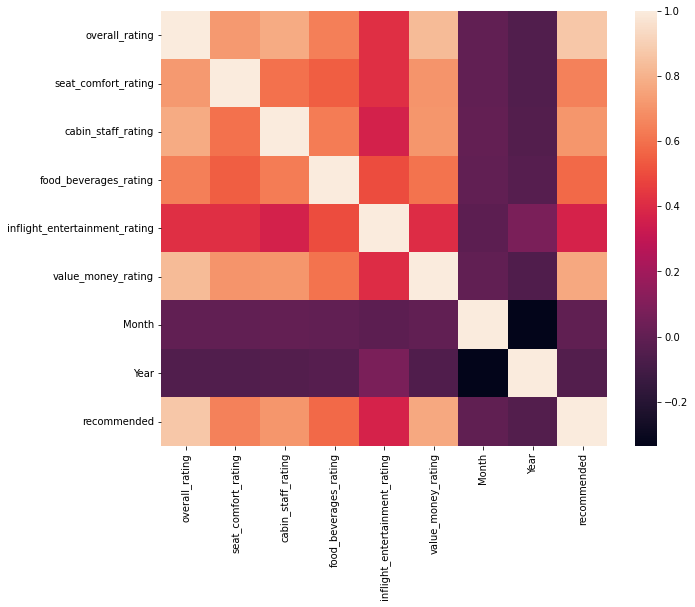

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
df.drop(['inflight_entertainment_rating', 'seat_comfort_rating', 'food_beverages_rating','cabin_staff_rating','Month','Year','overall_rating','value_money_rating','cabin_flown'
,'author_country' ], axis =1, inplace=True)

In [9]:
df.nunique()

airline_name      292
author          19634
content         27265
recommended         2
dtype: int64

#Sentiment analysis using with Ramdom Forest

###Importing libraries we might use

In [10]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


####Since we already did the EDA we can proceed forward 

In [11]:
#checking if recommended column has only 0 and 1 
df['recommended'].value_counts(normalize = True)


1    0.60387
0    0.39613
Name: recommended, dtype: float64

#### from here we can say that our model is not bais and we can still maintain a high level of accuracy. suppose if 1(i.e. postive) is more the model can give a bais outcome 

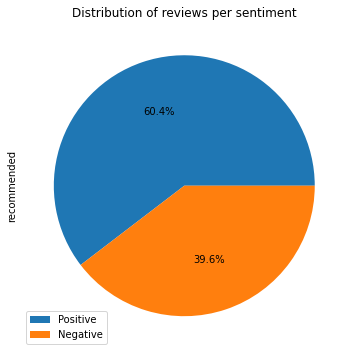

In [12]:
df['recommended'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

###Creating a wordcloud

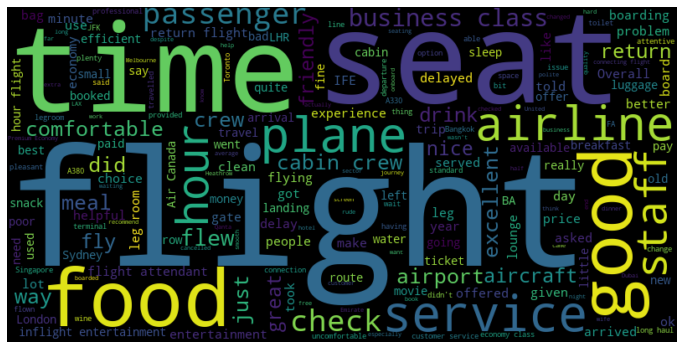

In [13]:
reviews = " ".join(df['content'])

#create the word cloud image 
word_cloud = WordCloud(stopwords= ENGLISH_STOP_WORDS,
                       width = 800,
                       height =400
                      )
# Generate the word cloud 
word_cloud.generate(reviews)

# Plot the cloud 
plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##Pre-processing the review text

####TfidVectorizer has a advantage of not only handling the stop words but will also help us to penilize the words like Flight, time and plane etc which is of not use to us for sentimental analysis to get the best accuracy


In [14]:
# Specify the word pattern
#regular expression - the patterns to work with text that can allow us to filter text, extract etc

pattern =r'[a-zA-Z]+'

# Build the vectorizer and fit the data
vect = TfidfVectorizer(
    token_pattern=pattern,
    stop_words= ENGLISH_STOP_WORDS,
    ngram_range=(1,2),
    max_features=600
)
#ngrams = combination of unique token

vect.fit(df['content'])

# Create sparse matrix from the vectorizer
tokenized_feature = vect.transform(df['content'])

# Create a DataFrame of the new feature 
features = pd.DataFrame(data = tokenized_feature.toarray(), 
                        columns=vect.get_feature_names_out()
                        )

features

,aa,able,absolutely,abu,abu dhabi,ac,acceptable,actually,adequate,agent,...,worked,working,world,worse,worst,worth,wouldn,wouldn t,year,years
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.186077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27279,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.198483,0.0,0.0,0.0,0.0,0.0,0.0
27280,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
27281,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
27282,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Let's add few more features 

In [15]:
#regular expression \S tells us anything that is not whitespaced 
df['char_count'] = df['content'].str.count(r'\S')
df['word_count'] = df['content'].str.count(pattern)
df['avg_word_length'] = df['char_count'] / df['word_count']

# displaying new DataFrame 
df.sample(3)


,airline_name,author,content,recommended,char_count,word_count,avg_word_length
15444,emirates,A Joven,I flew SYD-BKK in Sep 2014. This was my first ...,1,651,129,5.046512
734,air-arabia,D Graubard,A320 flight Sharjah-Yanbu (Saudi Arabia) on 16...,1,477,103,4.631068
28394,qatar-airways,R Johnston,I had the pleasure of flying with Qatar from N...,1,415,96,4.322917


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27284 entries, 0 to 41217
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline_name     27284 non-null  object 
 1   author           27284 non-null  object 
 2   content          27284 non-null  object 
 3   recommended      27284 non-null  int64  
 4   char_count       27284 non-null  int64  
 5   word_count       27284 non-null  int64  
 6   avg_word_length  27284 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ MB


## Fit the model and evaluate its performance

We will be using random forest classifier to evaluate our model. By setting "Recommended" as our target and taking 25% data for test and 75% data for training. 

In [17]:
# define X and y
# select all  the column after the char_count
X = pd.concat([features.reset_index(drop=True), df.loc[:, 'char_count':].reset_index(drop=True)], axis =1)
y =df['recommended']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25, 
    random_state= 45
)
#train a Random Forest classifier 
rf = RandomForestClassifier(random_state=45).fit(X_train, y_train)

# Predict the recommended
y_pred = rf.predict(X_test)

# print classiication metrics 
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2780
           1       0.85      0.92      0.88      4041

    accuracy                           0.85      6821
   macro avg       0.85      0.84      0.84      6821
weighted avg       0.85      0.85      0.85      6821



We tried to use different model such as adaboost, SVM and K-NN but got to know that Random Forest is the best accurate to detect someone's anxiety or sentiment based-on data from "content" . Hence, let us play with n_estimators and max_depth to know which is best. 

In [23]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(X_train, y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=5)

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test,y_pred), 3)
    precision = round(precision_score(y_test,y_pred), 3)
    recall = round(recall_score(y_test,y_pred), 3)
    print('MAX DEPTH: {} / N_EST: {} -- Accuracy: {} / Precision: {} / Recall: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 20 / N_EST: 100 -- Accuracy: 0.84 / Precision: 0.826 / Recall: 0.925
MAX DEPTH: None / N_EST: 100 -- Accuracy: 0.851 / Precision: 0.844 / Recall: 0.919
MAX DEPTH: None / N_EST: 5 -- Accuracy: 0.799 / Precision: 0.81 / Recall: 0.862


Finally, our model on test data, we can see the the best model is the second one:

with MAX DEPTH: None / N_estimators: 100



### Confusion Matrix

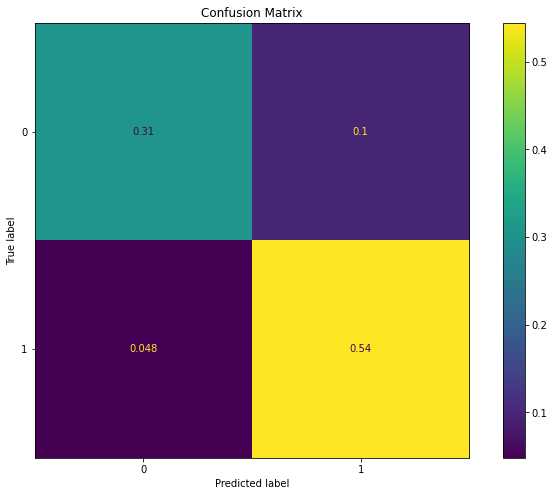

In [25]:
ConfusionMatrixDisplay.from_estimator(rf2, X_test, y_test, normalize='all')
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Which features contributed the most 
features = pd.DataFrame(
     {"feature": X.columns, 'Importance': rf2.feature_importances_}
 ).sort_values(by = 'Importance', ascending = False)

features

,feature,Importance
241,good,0.046469
186,excellent,0.033493
540,told,0.022620
109,comfortable,0.022091
230,friendly,0.021473
...,...,...
206,films,0.000345
387,order,0.000334
426,process,0.000295
297,klm,0.000279


At last we have plotted which top 20 importnat features or words, by which our model runs.  

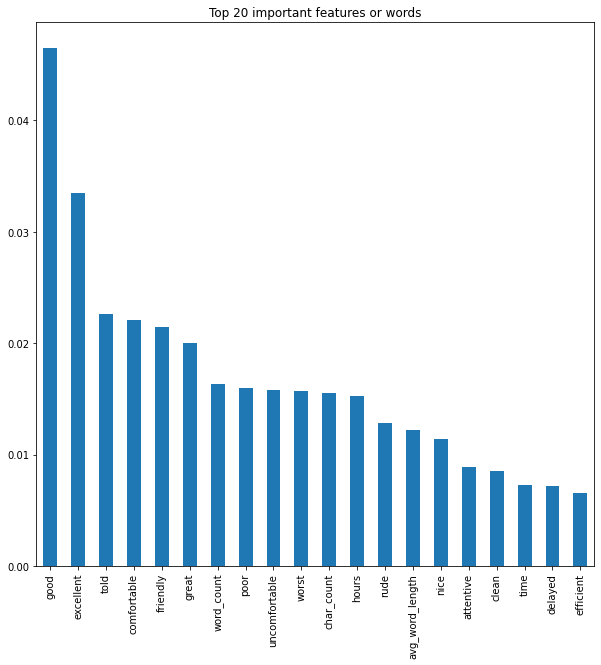

In [22]:
feat_importances = pd.Series(rf2.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features or words")
plt.show()